<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

In [25]:
import pandas as pd
data = pd.read_csv("insurance_data.csv")
data.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


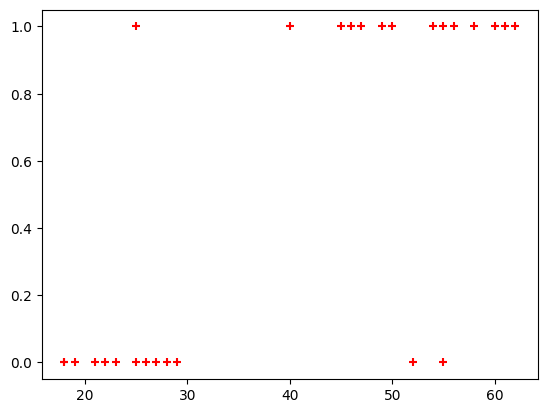

In [28]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [31]:
X_test

,age
14,49
24,50
7,60
6,55
4,46
1,25


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
X_test

,age
14,49
24,50
7,60
6,55
4,46
1,25


In [35]:
y_predicted = model.predict(X_test)

In [36]:
model.predict_proba(X_test)

array([[0.15016037, 0.84983963],
       [0.13173223, 0.86826777],
       [0.03199743, 0.96800257],
       [0.06613376, 0.93386624],
       [0.21819967, 0.78180033],
       [0.87257232, 0.12742768]])

In [37]:
model.score(X_test,y_test)

0.8333333333333334

In [38]:
y_predicted

array([1, 1, 1, 1, 1, 0])

In [39]:
X_test

,age
14,49
24,50
7,60
6,55
4,46
1,25


**model.coef_ indicates value of m in y=m*x + b equation**

In [40]:
model.coef_

array([[0.15238501]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [41]:
model.intercept_

array([-5.73352188])

**Lets defined sigmoid function now and do the math with hand**

In [42]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [43]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [44]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**
**0.485 is more than 0.5 which means person with 43 will buy the insurance**

In [45]:
age = 43
prediction_function(age)

0.568565299077705

In [47]:
import pandas as pd

df = pd.read_csv("insurance_data.csv")
print(df.head())
print(df.columns)


   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1
Index(['age', 'bought_insurance'], dtype='object')


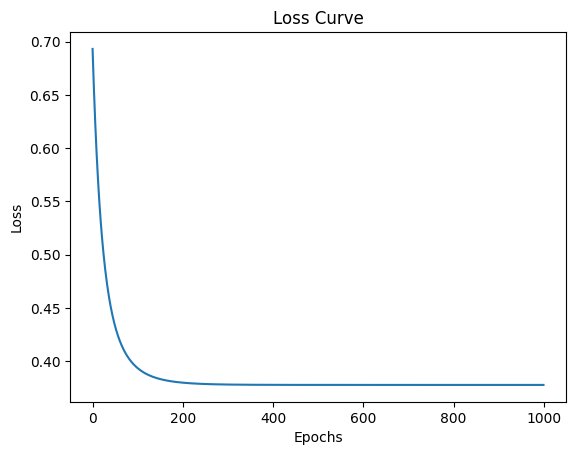

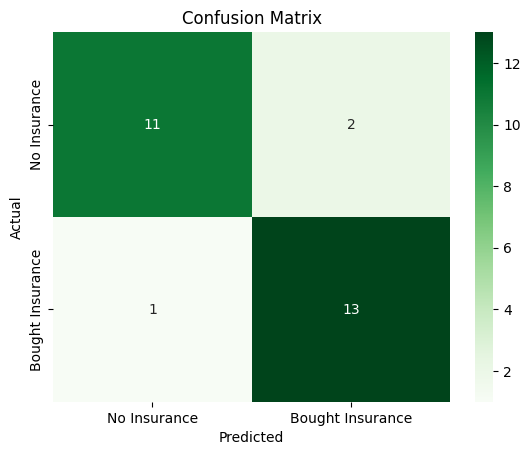

                  precision    recall  f1-score   support

    No Insurance       0.92      0.85      0.88        13
Bought Insurance       0.87      0.93      0.90        14

        accuracy                           0.89        27
       macro avg       0.89      0.89      0.89        27
    weighted avg       0.89      0.89      0.89        27



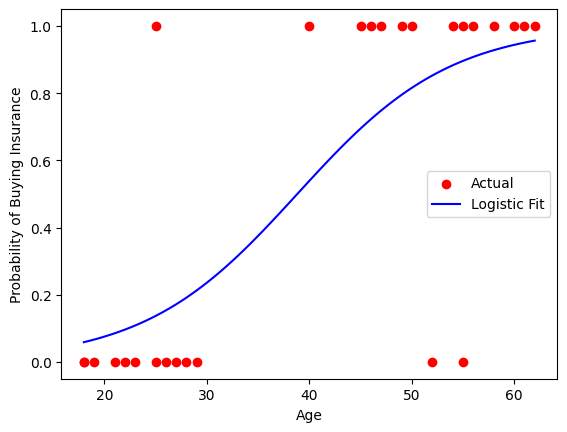

In [48]:
# ----------------------------------------------------------
# Logistic Regression from Scratch - Insurance Data
# ----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("insurance_data.csv")

# Extract features and labels
X = df[['age']].values      # input feature
y = df[['bought_insurance']].values  # target output

# Normalize feature
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (n, 2)

# Step 2: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Loss Function (Binary Cross Entropy)
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-8
    return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))

# Step 4: Gradient Descent
def gradient_descent(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        error = y_pred - y

        grad = (1/m) * np.dot(X.T, error)
        theta -= lr * grad

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

# Step 5: Train Model
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# Step 6: Predictions
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Step 7: Plot Loss Curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# Step 8: Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Insurance", "Bought Insurance"],
            yticklabels=["No Insurance", "Bought Insurance"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Classification Report
print(classification_report(y, y_pred, target_names=["No Insurance", "Bought Insurance"]))

# Step 10: Visualizing Decision Boundary
plt.scatter(df['age'], df['bought_insurance'], color='red', label='Actual')
ages = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
ages_scaled = (ages - df['age'].mean()) / df['age'].std()
ages_scaled = np.hstack([np.ones((ages_scaled.shape[0], 1)), ages_scaled])
pred_probs = sigmoid(np.dot(ages_scaled, theta))
plt.plot(ages, pred_probs, color='blue', label='Logistic Fit')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.legend()
plt.show()


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model